In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

**Visualizing Data

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [255]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Cleaning Data

In [256]:
df1 = df.dropna()

In [257]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [258]:
df1['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [259]:
df1 = df1[(df1['gender'] != 'Other')]

In [260]:
df1.shape[0]

4908

**Analyzing the Percentage of Stroke in the Population

In [261]:
df1['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [108]:
pct_stroke = round((209/4908)*100,2)
print(f'percentage of stroke in the population: {pct_stroke}%')

percentage of stroke in the population: 4.26%


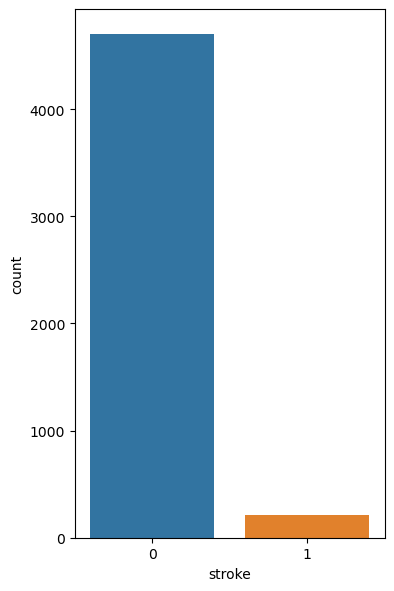

In [109]:
plt.figure(figsize=(4,7),dpi=100)
sns.countplot(data=df1, x='stroke');

**Analyzing Gender Variable

In [110]:
df1[['gender', 'stroke']].value_counts()

gender  stroke
Female  0         2777
Male    0         1922
Female  1          120
Male    1           89
dtype: int64

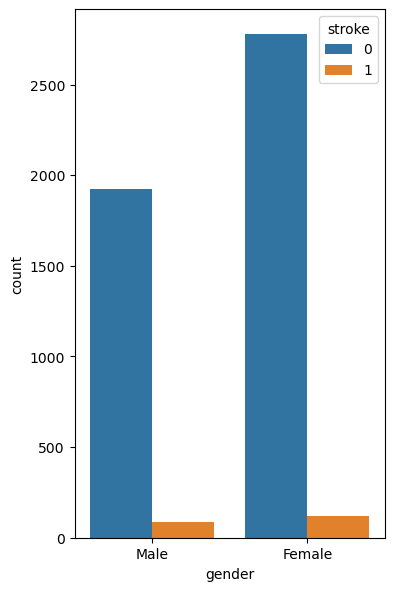

In [111]:
plt.figure(figsize=(4,7),dpi=100)
sns.countplot(data=df1, x='gender', hue='stroke');

In [112]:
pct_male_stroke = round((89/2011)*100,2)
print(f'percentage of male stroke in the sample: {pct_male_stroke}%')

percentage of male stroke in the sample: 4.43%


In [241]:
pct_female_stroke = round((120/2897)*100,2)
print(f'percentage of female stroke in the sample: {pct_female_stroke}%')

percentage of female stroke in the sample: 4.14%


We see that there is a difference in the percentage of stroke in male and female groups related to the overall percentage, but it is not enough to say that stroke is dependent upon gender, so we need to apply a Chi-Square Test on gender variable

In [114]:
data_male = [89,1922]
data_female = [120,2777]
gender_id=['stroke','nostroke']

In [115]:
genderdf = np.c_[data_male,data_female]

In [116]:
genderdf = pd.DataFrame(data=genderdf, index=gender_id, columns=['male','female'])

**Observed Values

In [117]:
genderdf['tot'] = genderdf['male'] + genderdf['female']
genderdf

,male,female,tot
stroke,89,120,209
nostroke,1922,2777,4699


In [118]:
genderdf.sum()

male      2011
female    2897
tot       4908
dtype: int64

**Expected Values

In [119]:
male_stroke = round((2011*209)/4908,2)
male_nostroke = round((2011*4699)/4908,2)
female_stroke = round((2897*209)/4908,2)
female_nostroke = round((2897*4699)/4908,2)

In [120]:
print(f'{male_stroke},{male_nostroke},{female_stroke},{female_nostroke}')

85.64,1925.36,123.36,2773.64


In [121]:
expdata_male = [85.64, 1925.36]
expdata_female=[123.36,2773.64]

In [122]:
exp_genderdf = np.c_[expdata_male, expdata_female]

In [123]:
exp_genderdf = pd.DataFrame(data=exp_genderdf, index=gender_id, columns=['male', 'female'])

In [124]:
exp_genderdf['tot'] = exp_genderdf['male'] + exp_genderdf['female']

In [125]:
exp_genderdf

,male,female,tot
stroke,85.64,123.36,209.0
nostroke,1925.36,2773.64,4699.0


H0: Stroke is independent upon gender / H1: Stroke is dependent upon gender - Level of significance = 0.05 - Degrees of freedom is 1 - So the critical value is defined as being 3.841

In [126]:
X2 = (((89 - 85.64)**2)/85.64) + (((120 - 123.36)**2)/123.36) + (((1922 - 1925.36)**2)/1925.36) + (((2777 - 2773.64)**2)/2773.64)

In [127]:
X2

0.23327770898882477

X2 < Critical Value so we fail to reject the H0 hypotesis, then stroke is independent upon gender. This variable must not be selected to a predictive model. 

**Analyzing Hypertension Variable

In [128]:
df1['hypertension'].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [129]:
df1[['hypertension', 'stroke']].value_counts()

hypertension  stroke
0             0         4308
1             0          391
0             1          149
1             1           60
dtype: int64

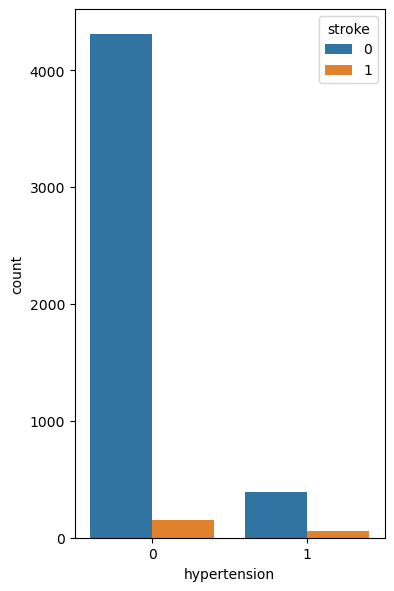

In [130]:
plt.figure(figsize=(4,7),dpi=100)
sns.countplot(data=df1, x='hypertension', hue='stroke');

In [131]:
pct_hyper_stroke = round((60/451)*100,2)
print(f'percentage of hypertension people who had stroke: {pct_hyper_stroke}%')

percentage of hypertension people who had stroke: 13.3%


In [132]:
pct_hyper_stroke = round((149/4457)*100,2)
print(f'percentage of non hypertension people who had stroke: {pct_hyper_stroke}%')

percentage of non hypertension people who had stroke: 3.34%


We see that there is a huge difference in the percentage of stroke in hypertension and non hypertension groups related to the overall percentage, but it is not enough to say that stroke is dependent upon hypertension, so we need to apply a Chi-Square Test on hypertension variable

In [133]:
data_hyper = [60,391]
data_nohyper = [149,4308]
hyper_id=['stroke','nostroke']

In [134]:
hyperdf = np.c_[data_hyper, data_nohyper]

In [135]:
hyperdf = pd.DataFrame(data=hyperdf, index=hyper_id, columns=['hyper','nohyper'])

**Observed Values

In [136]:
hyperdf['tot'] = hyperdf['hyper'] + hyperdf['nohyper']
hyperdf

,hyper,nohyper,tot
stroke,60,149,209
nostroke,391,4308,4699


In [137]:
hyperdf.sum()

hyper       451
nohyper    4457
tot        4908
dtype: int64

**Expected Values

In [138]:
hyper_stroke = round((451*209)/4908,2)
hyper_nostroke = round((451*4699)/4908,2)
nohyper_stroke = round((4457*209)/4908,2)
nohyper_nostroke = round((4457*4699)/4908,2)

In [139]:
print(f'{hyper_stroke}, {hyper_nostroke}, {nohyper_stroke}, {nohyper_nostroke}')

19.21, 431.79, 189.79, 4267.21


In [140]:
expdata_hyper = [19.21, 431.79]
expdata_nohyper = [189.79, 4267.21]

In [141]:
exp_hyperdf = np.c_[expdata_hyper, expdata_nohyper]

In [142]:
exp_hyperdf = pd.DataFrame(data=exp_hyperdf, index=hyper_id, columns=['hyper', 'nohyper'])

In [143]:
exp_hyperdf['tot'] = exp_hyperdf['hyper'] + exp_hyperdf['nohyper']
exp_hyperdf

,hyper,nohyper,tot
stroke,19.21,189.79,209.0
nostroke,431.79,4267.21,4699.0


H0: Stroke is independent upon hypertension / H1: Stroke is dependent upon hypertension - Level of significance = 0.05 - Degrees of freedom is 1 - So the critical value is defined as being 3.841

In [144]:
X2 = (((60 - 19.21)**2)/19.21) + (((149 - 189.79)**2)/189.79) + (((391 - 431.79)**2)/431.79) + (((4308 - 4267.21)**2)/4267.21)

In [145]:
X2

99.62227993556107

X2 > Critical Value so we can reject the H0 hypotesis, then stroke is dependent upon hypertension. This variable must be selected to a predictive model. 

** Analyzing the ever_married variable

In [146]:
df1[['ever_married', 'stroke']].value_counts()

ever_married  stroke
Yes           0         3018
No            0         1681
Yes           1          186
No            1           23
dtype: int64

In [147]:
df1['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

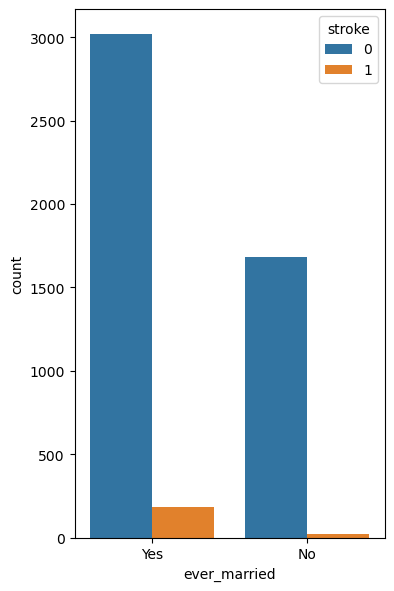

In [148]:
plt.figure(figsize=(4,7), dpi=100)
sns.countplot(data=df1, x='ever_married', hue='stroke')

In [149]:
df1['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [150]:
pct_yesmarried_stroke = round((186/3204)*100,2)
print(f'percentage of married people who had stroke: {pct_yesmarried_stroke}%')

percentage of married people who had stroke: 5.81%


In [151]:
pct_nomarried_stroke = round((23/1704)*100,2)
print(f'percentage of never married people who had stroke: {pct_nomarried_stroke}%')

percentage of never married people who had stroke: 1.35%


We see that there is a huge difference in the percentage of stroke in yes married and never married groups related to the overall percentage, but it is not enough to say that stroke is dependent upon married, so we need to apply a Chi-Square Test on ever married variable

In [152]:
data_yesmarried = [186,3018]
data_nomarried = [23,1681]
married_id=['stroke','nostroke']

In [153]:
marrieddf = np.c_[data_yesmarried, data_nomarried]

In [154]:
marrieddf = pd.DataFrame(data = marrieddf, index = married_id, columns = ['yes', 'no'])

** Observed Values

In [155]:
marrieddf['tot'] = marrieddf['yes'] + marrieddf['no']
marrieddf

,yes,no,tot
stroke,186,23,209
nostroke,3018,1681,4699


In [156]:
marrieddf.sum()

yes    3204
no     1704
tot    4908
dtype: int64

**Expected Values

In [157]:
yesm_stroke = round((3204*209)/4908,2)
yesm_nostroke = round((3204*4699)/4908,2)
nom_stroke = round((1704*209)/4908,2)
nom_nostroke = round((1704*4699)/4908,2)

In [158]:
print(f'{yesm_stroke}, {yesm_nostroke}, {nom_stroke}, {nom_nostroke}')

136.44, 3067.56, 72.56, 1631.44


In [159]:
expdata_yesm = [136.44, 3067.56]
expdata_nom = [72.56, 1631.44]

In [160]:
expecdata = np.c_[expdata_yesm, expdata_nom]

In [161]:
expecdata = pd.DataFrame(data=expecdata, index=married_id, columns=['yes', 'no'])
expecdata

,yes,no
stroke,136.44,72.56
nostroke,3067.56,1631.44


H0: Stroke is independent upon ever_married / H1: Stroke is dependent upon ever_married - Level of significance = 0.05 - Degrees of freedom is 1 - So the critical value is defined as being 3.841

In [162]:
X2 = (((186 - 136.44)**2)/136.44) + (((23 - 72.56)**2)/72.56) + (((3018 - 3067.56)**2)/3067.56) + (((1681 - 1631.44)**2)/1631.44)
X2

54.158760111442874

X2 > Critical Value so we can reject the H0 hypotesis, then stroke is dependent upon ever_married. This variable must be selected to a predictive model.

**Analyzing Work Type Variable

In [163]:
df1[['work_type', 'stroke']].value_counts()

work_type      stroke
Private        0         2683
Self-employed  0          722
children       0          670
Govt_job       0          602
Private        1          127
Self-employed  1           53
Govt_job       1           28
Never_worked   0           22
children       1            1
dtype: int64

In [164]:
df1['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

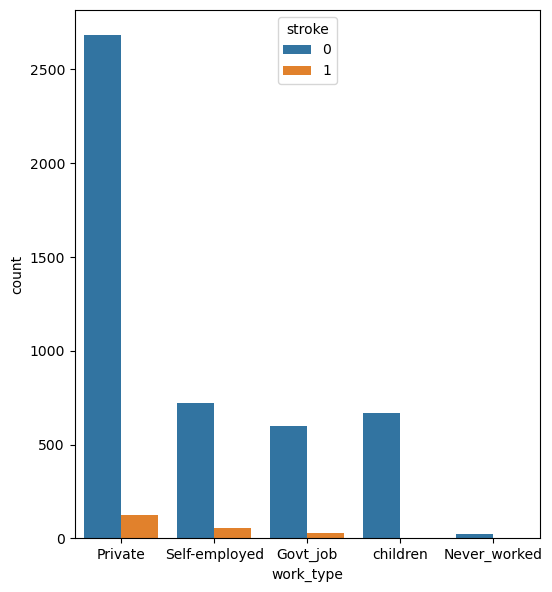

In [165]:
plt.figure(figsize=(6,7),dpi=100)
sns.countplot(data=df1, x='work_type', hue='stroke' )

Considering that never_worked just have a small number of data and all of then no stroke, and children have just 01 case of stroke we will remove this two itens from the work_type analysis. 

In [ ]:
pct_pv_stroke = round((57/836)*100,2)
print(f'percentage of private who had stroke: {pct_pv_stroke}%')
pct_se_stroke = round((84/1852)*100,2)
print(f'percentage of self employed who had stroke: {pct_se_stroke}%')
pct_gj_stroke = round((39/737)*100,2)
print(f'percentage of govern job who had stroke: {pct_gj_stroke}%')

**Expected Values

In [292]:
pv_stroke = round((2810*208)/4215,2)
pv_nostroke = round((2810*4007)/4215,2)
se_stroke = round((775*208)/4215,2)
se_nostroke = round((775*4007)/4215,2)
gj_stroke = round((630*208)/4215,2)
gj_nostroke = round((630*4007)/4215,2)

In [293]:
print(f'{pv_stroke}, {pv_nostroke}, {se_stroke}, {se_nostroke}, {gj_stroke}, {gj_nostroke}')

138.67, 2671.33, 38.24, 736.76, 31.09, 598.91


In [294]:
X2 = (((127 - 138.67)**2)/138.67) + (((53 - 38.24)**2)/38.24) + (((28 - 31.09)**2)/31.09) + (((2683 - 2671.33)**2)/2671.33) + (((722 - 736.76)**2)/736.76) + (((602 - 598.91)**2)/598.91)
X2

7.3489534443950655

H0: Stroke is independent upon work_type / H1: Stroke is dependent upon work_type - Level of significance = 0.05 - Degrees of freedom is 2 - So the critical value is defined as being 5.991

X2 > Critical Value, so we can reject the H0 hypotesis, then stroke is dependent upon work_type, but if we consider a 97.5% of significance, the critical value is 7.378 and, in this case, we are going to fail in reject the H0 hypotesis.

**Analysing Residence_type Variable

In [263]:
df1['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [262]:
df1[['Residence_type', 'stroke']].value_counts()

Residence_type  stroke
Urban           0         2381
Rural           0         2318
Urban           1          109
Rural           1          100
dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

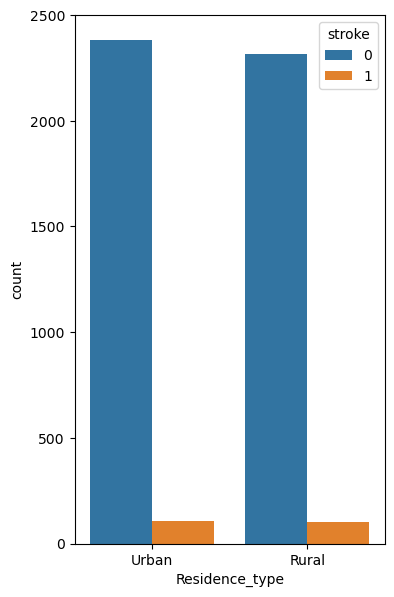

In [265]:
plt.figure(figsize=(4,7), dpi=100)
sns.countplot(data=df1, x='Residence_type', hue='stroke')

In [266]:
pct_urban_stroke = round((109/2381)*100,2)
print(f'percentage of urban people who had stroke: {pct_urban_stroke}%')

percentage of urban people who had stroke: 4.58%


In [269]:
pct_rural_stroke = round((100/2318)*100,2)
print(f'percentage of rural people who had stroke: {pct_rural_stroke}%')

percentage of rural people who had stroke: 4.31%


We see that there is a small difference in the percentage of stroke in urban and rural groups related to the overall percentage, so we need to apply a Chi-Square Test on Residence_type variable to see if stroke is dependent upon it.

**Expected Values

In [275]:
urban_stroke = round((2490*209)/4908,2)
urban_nostroke = round((2490*4699)/4908,2)
rural_stroke = round((2418*209)/4908,2)
rural_nostroke = round((2418*4699)/4908,2)

In [276]:
print(f'{urban_stroke}, {urban_nostroke}, {rural_stroke}, {rural_nostroke}')

106.03, 2383.97, 102.97, 2315.03


In [277]:
X2 = (((109 - 106.03)**2)/106.03) + (((100 - 102.97)**2)/102.97) + (((2381 - 2383.97)**2)/2383.97) + (((2318 - 2315.03)**2)/2315.03)
X2

0.1763676125207052

H0: Stroke is independent upon residence_type / H1: Stroke is dependent upon residence_type - Level of significance = 0.05 - Degrees of freedom is 1 - So the critical value is defined as being 3.841

X2 < Critical Value, so we fail to reject the H0 Hypotesis. Then stroke is independent upon residence_type. This variable must not be used to a predictive model. 

** Analysing somking_status

In [167]:
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

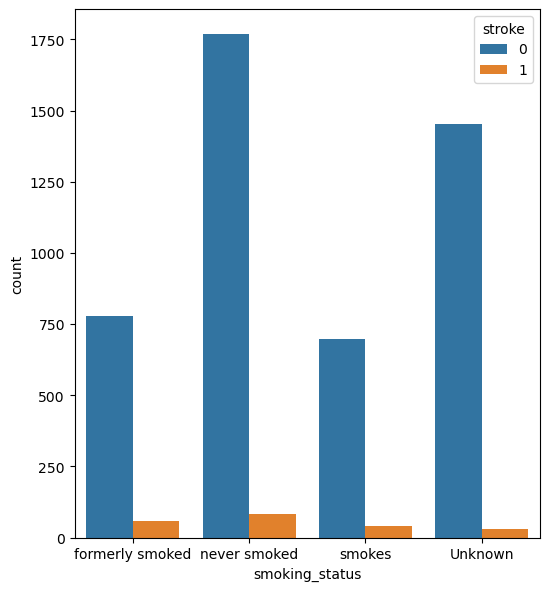

In [284]:
plt.figure(figsize=(6,7), dpi=100)
sns.countplot(data=df1, x='smoking_status', hue='stroke')

In [285]:
df1[['smoking_status', 'stroke']].value_counts()

smoking_status   stroke
never smoked     0         1768
Unknown          0         1454
formerly smoked  0          779
smokes           0          698
never smoked     1           84
formerly smoked  1           57
smokes           1           39
Unknown          1           29
dtype: int64

let's remove the unknown values, because it don't help us to define the relationship

In [286]:
pct_fs_stroke = round((57/836)*100,2)
print(f'percentage of formely smoked who had stroke: {pct_fs_stroke}%')
pct_ns_stroke = round((84/1852)*100,2)
print(f'percentage of never smoked who had stroke: {pct_ns_stroke}%')
pct_s_stroke = round((39/737)*100,2)
print(f'percentage of smokes who had stroke: {pct_s_stroke}%')

percentage of formely smoked who had stroke: 6.82%
percentage of never smoked who had stroke: 4.54%
percentage of smokes who had stroke: 5.29%


**Expected values

In [287]:
fs_stroke = round((836*180)/3425,2)
fs_nostroke = round((836*3245)/3425,2)
ns_stroke = round((1852*180)/3425,2)
ns_nostroke = round((1852*3245)/3425,2)
ss_stroke = round((737*180)/3425,2)
ss_nostroke = round((737*3245)/3425,2)

In [288]:
print(f'{fs_stroke}, {fs_nostroke}, {ns_stroke}, {ns_nostroke}, {ss_stroke}, {ss_nostroke}')

43.94, 792.06, 97.33, 1754.67, 38.73, 698.27


In [289]:
X2 = (((57 - 43.94)**2)/43.94) + (((84 - 97.33)**2)/97.33) + (((39 - 38.73)**2)/38.73) + (((779 - 792.06)**2)/792.06) + (((1768 - 1754.67)**2)/1754.67) + (((698 - 698.27)**2)/698.27)
X2

6.02596685445774

H0: Stroke is independent upon smoking_status / H1: Stroke is dependent upon smoking_stauts - Level of significance = 0.05 - Degrees of freedom is 2 - So the critical value is defined as being 5.991

X2 > Critical Value, so we can reject the H0 hypotesis, then stroke is dependent upon smoking_status, but if we consider a 97.5% of significance, the critical value is 7.378 and, in this case, we are going to fail in reject the H0 hypotesis. 

**Analysing herart_disease

In [168]:
df1['heart_disease'].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [169]:
df1[['heart_disease', 'stroke']].value_counts()

heart_disease  stroke
0              0         4496
1              0          203
0              1          169
1              1           40
dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

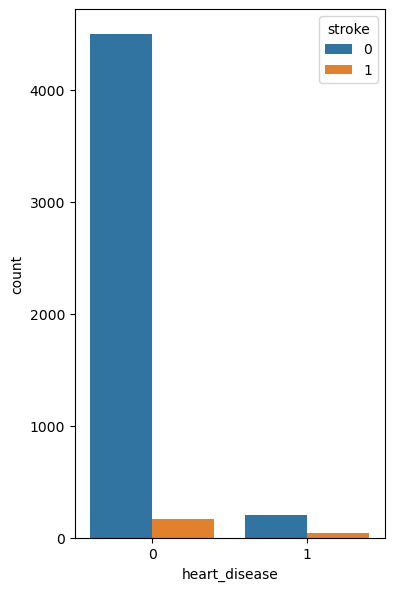

In [278]:
plt.figure(figsize=(4,7), dpi=100)
sns.countplot(data=df1, x='heart_disease', hue='stroke')

In [279]:
pct_hd_stroke = round((40/203)*100,2)
print(f'percentage of heart disease people who had stroke: {pct_hd_stroke}%')

percentage of heart disease people who had stroke: 19.7%


In [280]:
pct_nohd_stroke = round((169/4496)*100,2)
print(f'percentage of no heart disease people who had stroke: {pct_nohd_stroke}%')

percentage of no heart disease people who had stroke: 3.76%


We see that there is a huge difference in the percentage of stroke for people who have heart disease and have not, related to the overall percentage, so we need to apply a Chi-Square Test on heart_disease variable to see if stroke is dependent upon it.

** Expected Values

In [281]:
hd_stroke = round((243*209)/4908,2)
hd_nostroke = round((243*4699)/4908,2)
nhd_stroke = round((4665*209)/4908,2)
nhd_nostroke = round((4665*4699)/4908,2)

In [282]:
print(f'{hd_stroke}, {hd_nostroke}, {nhd_stroke}, {nhd_nostroke}')

10.35, 232.65, 198.65, 4466.35


In [283]:
X2 = (((40 - 10.35)**2)/10.35) + (((169 - 198.65)**2)/198.65) + (((203 - 232.65)**2)/232.65) + (((4665 - 4466.35)**2)/4466.35)
X2

101.97895341945647

H0: Stroke is independent upon heart_disease / H1: Stroke is dependent upon heart_desease - Level of significance = 0.05 - Degrees of freedom is 1 - So the critical value is defined as being 3.841

X2 > Critical Value, so we can reject the H0 Hypotesis. Then stroke is dependent upon heart_disease. This variable be used to a predictive model.

**Analyzing the numerical variables 

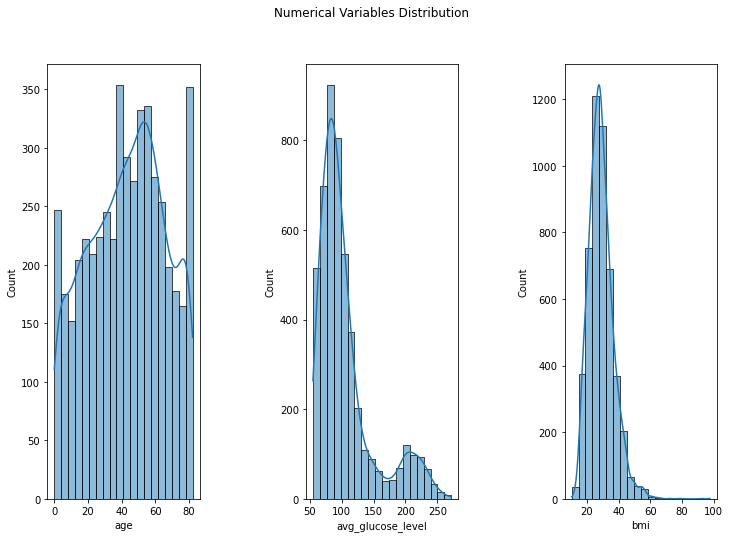

In [240]:
fig, axes = plt.subplots(1,3, figsize=(12,8))
fig.subplots_adjust(hspace=0.5, wspace=0.7)
plt.suptitle('Numerical Variables Distribution')
sns.histplot(ax = axes[0], data=df1, x='age', bins=20, kde=True)  
sns.histplot(ax = axes[1], data=df1, x='avg_glucose_level', bins=20, kde=True)
sns.histplot(ax = axes[2], data=df1, x='bmi', bins=20, kde=True);

In [171]:
df1.groupby('stroke').mean()[['age','avg_glucose_level','bmi']]

,age,avg_glucose_level,bmi
stroke,,,
0,41.763805,103.995367,28.824431
1,67.712919,134.571388,30.471292


In [231]:
print('the mean age of stroke data is 67.71 and no stroke data is 41.76') 
print('the mean glucose of stroke data is 134.57 and no stroke data is 103.99')
print('the mean bmi of stroke data is 30.47 and no stroke data is 28.82')

the mean age of stroke data is 67.71 and no stroke data is 41.76
the mean glucose of stroke data is 134.57 and no stroke data is 103.99
the mean bmi of stroke data is 30.47 and no stroke data is 28.82


In [172]:
dflargest = df1.nlargest(491,'avg_glucose_level')

In [173]:
ngl = dflargest[dflargest['stroke'] == 1].shape[0]
ngl_pct = round((ngl/491)*100,2)
ngl_pct

12.83

In [174]:
dflargest = df1.nlargest(491,'bmi')

In [175]:
nbmi = dflargest[dflargest['stroke'] == 1].shape[0]
nbmi_pct = round((nbmi/491)*100,2)
nbmi_pct

4.28

In [176]:
dflargest = df1.nlargest(491,'age')

In [177]:
nage = dflargest[dflargest['stroke'] == 1].shape[0]
nage_pct = round((nage/491)*100,2)
nage_pct

18.33

In [178]:
print(f'considering among the 10% higest values of age, the percentage of get a stroke is {nage_pct}%')
print(f'considering among the 10% higest values of glucose, the percentage of get a stroke is {ngl_pct}%')
print(f'considering among the 10% higest values of bmi, the percentage of get a stroke is {nbmi_pct}%')

considering among the 10% higest values of age, the percentage of get a stroke is 18.33%
considering among the 10% higest values of glucose, the percentage of get a stroke is 12.83%
considering among the 10% higest values of bmi, the percentage of get a stroke is 4.28%


In [179]:
dfmod = df1

In [180]:
bins = [0,18,36,54,72,90]
labels = ['0-18','18-36','36-54','54-72','72-90']
dfmod['age'] = pd.cut(dfmod['age'], bins=bins, labels=labels)

In [181]:
dfmod.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,72-90,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,36-54,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,72-90,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,72-90,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [182]:
bins = [0,18,25,30,40]
labels = ['0-18','18-25','25-30','30-40']
dfmod['bmi'] = pd.cut(dfmod['bmi'], bins=bins, labels=labels)
dfmod.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,0,1,Yes,Private,Urban,228.69,30-40,formerly smoked,1
2,31112,Male,72-90,0,1,Yes,Private,Rural,105.92,30-40,never smoked,1
3,60182,Female,36-54,0,0,Yes,Private,Urban,171.23,30-40,smokes,1
4,1665,Female,72-90,1,0,Yes,Self-employed,Rural,174.12,18-25,never smoked,1
5,56669,Male,72-90,0,0,Yes,Private,Urban,186.21,25-30,formerly smoked,1


In [183]:
bins = [0,100,150,200,250,300]
labels = ['0-100','100-150','150-200','200-250','250-300']
dfmod['avg_glucose_level'] = pd.cut(dfmod['avg_glucose_level'], bins=bins, labels=labels)
dfmod.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,0,1,Yes,Private,Urban,200-250,30-40,formerly smoked,1
2,31112,Male,72-90,0,1,Yes,Private,Rural,100-150,30-40,never smoked,1
3,60182,Female,36-54,0,0,Yes,Private,Urban,150-200,30-40,smokes,1
4,1665,Female,72-90,1,0,Yes,Self-employed,Rural,150-200,18-25,never smoked,1
5,56669,Male,72-90,0,0,Yes,Private,Urban,150-200,25-30,formerly smoked,1


<AxesSubplot:xlabel='bmi', ylabel='count'>

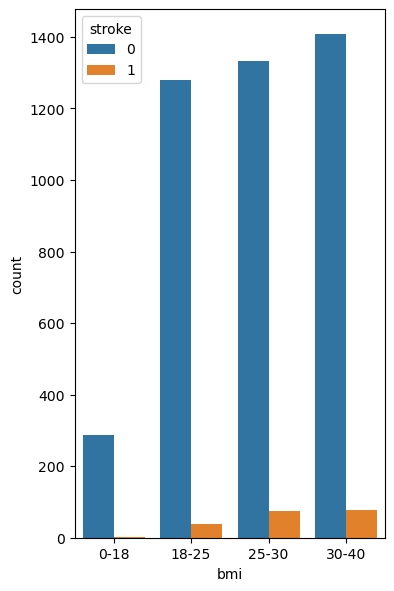

In [184]:
plt.figure(figsize=(4,7),dpi=100)
sns.countplot(data=dfmod, x='bmi', hue='stroke')

Its hard to see if there is a correlation between bmi and stroke, looking this graphic it seems to be same proportion for each range of bmi value.

<AxesSubplot:xlabel='age', ylabel='count'>

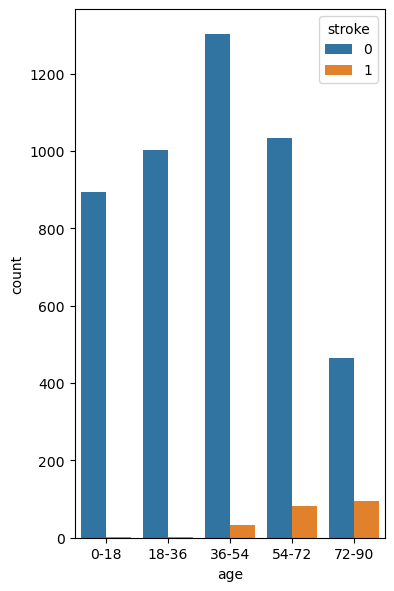

In [185]:
plt.figure(figsize=(4,7),dpi=100)
sns.countplot(data=dfmod, x='age', hue='stroke')

It is ease to see that proportion of stroke in eldery people is much greater than younger people. 

<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

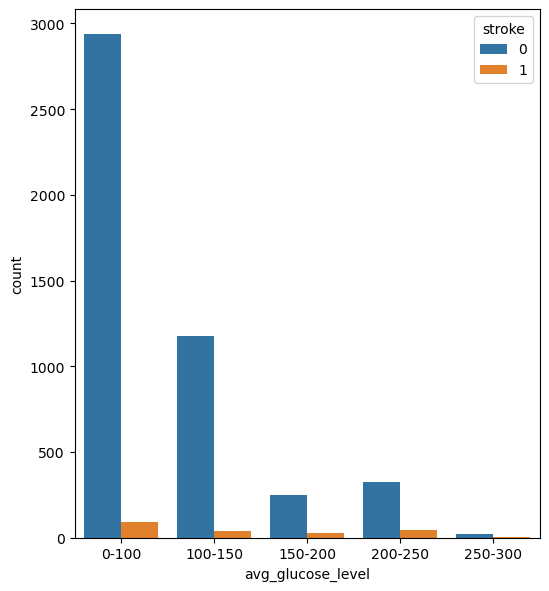

In [188]:
plt.figure(figsize=(6,7),dpi=100)
sns.countplot(data=dfmod, x='avg_glucose_level', hue='stroke')

We can see here that proportion of stroke in people which high level of glucose is little bit greater than low levels. 

Considering all these data it clear that age and glucose impacts on the risk of having a stroke, but it is not clear if bmi has the same impact. So we will procedure a independt mean analysis to see if there is some dependence between this variables. 

In [211]:
df1[df1['stroke'] == 1].describe()['bmi']

count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000
Name: bmi, dtype: float64

In [210]:
df1[df1['stroke'] == 0].describe()['bmi']

count    4699.000000
mean       28.824431
std         7.908573
min        10.300000
25%        23.400000
50%        28.000000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [215]:
bmistroke = df1[df1['stroke'] == 1]

In [216]:
bminostroke = df1[df1['stroke'] == 0]

[Text(0.5, 1.0, 'no stroke')]

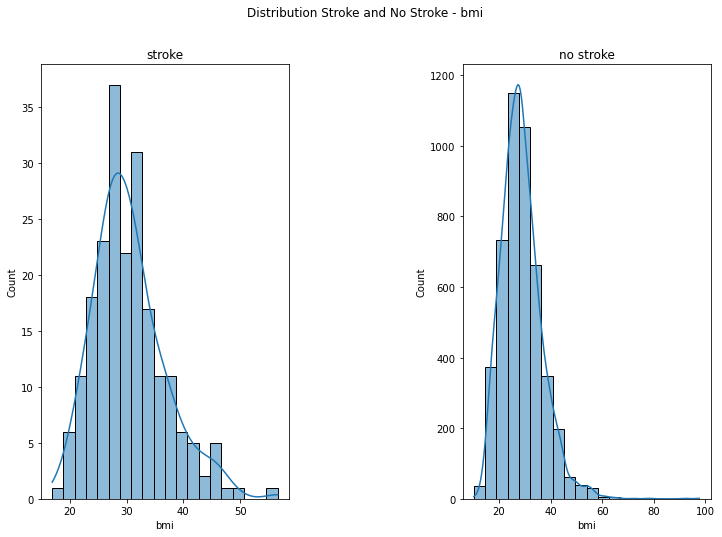

In [228]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5, wspace=0.7)
plt.suptitle('Distribution Stroke and No Stroke - bmi')
sns.histplot(ax = axes[0], data=bmistroke, x='bmi', bins=20, kde=True).set(title='stroke')
sns.histplot(ax = axes[1], data=bminostroke, x='bmi', bins=20, kde=True).set(title='no stroke')

In [250]:
Zc = (30.471 - 28.824) / (((6.329**2)/209) + ((7.908**2)/4699))**0.5

In [251]:
Zc

3.6379239919576825

considering H0: M1 iqual M2 / H1: M1 not iqual M2 and defining a significance in 95% to two tail test, than Z is iqual to 1.96. So Zc is in the rejection area, then we can say that stroke is dependent upon bmi, because the mean of stroke data and nostroke data are different. BMI must be used to a predictive model.

RESUME:

STROKE IS INDEPDENDT UPON GENDER - GENDER MUST NOT BE SELECTED TO PREDICTIVE MODEL

STROKE IS DEPENDENT UPON HYPERTENSION - HYPERTENSION MUST BE SELECTED TO PREDICTIVE MODEL

STROKE IS DEPENDENT UPON EVER_MARRIED - EVER_MARRIED MUST BE SELECTED TO PRODICTIVE MODEL

STROKE IS DEPENDENT UPON WORK_TYPE TO 95% OF SIGNIFICANCE, IF WE INCREASE THE SIGNIFICANCE TO 97.5% STROKE WILL BE INDEPENDENT, SO TWO PREDICTIVE MODEL SHOULD BE DONE, CONSIDERING AND NOT CONSIDERING THIS VARIABLE

STROKE IS INDEPDENDT UPON RESIDENCE_TYPE - RESIDENCE_TYPE MUST NOT BE SELECTED TO PREDICTIVE MODEL

STROKE IS DEPENDENT UPON SMOKING_STATUS TO 95% OF SIGNIFICANCE, IF WE INCREASE THE SIGNIFICANCE TO 97.5% STROKE WILL BE INDEPENDENT, SO TWO PREDICTIVE MODEL SHOULD BE DONE, CONSIDERING AND NOT CONSIDERING THIS VARIABLE

STROKE IS DEPENDENT UPON HEART_DISEASE - HEART_DISEASE MUST BE SELECTED TO PRODICTIVE MODEL

THE NUMERICAL VARIABLES, AGE, AVG_GLUCOSE AND BMI HAVE DIFFERENT STATISTICAL MEANS CONSIDERING STROKE AND NO STROKE SAMPLES, SO THIS VARIABLES MUST BE SELECTED TO PREDICTIVE MODEL